In [ ]:
import pandas as pd
df = pd.read_csv('owid-covid-data.csv')
print(df.columns)


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
df = pd.read_csv('owid-covid-data.csv')
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [ ]:
df = pd.read_csv('owid-covid-data.csv')
missing_values = df.isnull().sum()
print(missing_values)



iso_code                                           0
continent                                      26525
location                                           0
date                                               0
total_cases                                    17631
new_cases                                      19276
new_cases_smoothed                             20506
total_deaths                                   17631
new_deaths                                     18827
new_deaths_smoothed                            20057
total_cases_per_million                        17631
new_cases_per_million                          19276
new_cases_smoothed_per_million                 20506
total_deaths_per_million                       17631
new_deaths_per_million                         18827
new_deaths_smoothed_per_million                20057
reproduction_rate                             244618
icu_patients                                  390319
icu_patients_per_million                      

In [27]:

# Define the list of countries of interest
countries_of_interest = ['Nigeria', 'Kenya', 'United States', 'India', 'South Africa', 'China']
# Filter the DataFrame for the specified countries
filtered_df = df[df['location'].isin(countries_of_interest)]
# Print each country on a new line
print("Countries of Interest:")
for country in countries_of_interest:
     print("-", country)




Countries of Interest:
- Nigeria
- Kenya
- United States
- India
- South Africa
- China


In [29]:
# Define countries of interest
countries_of_interest = ['Nigeria', 'Kenya', 'United States', 'India', 'South Africa', 'China']

# Filter for those countries
df_filtered = df[df['location'].isin(countries_of_interest)]

# Define critical columns (adjust as needed)
critical_columns = ['date', 'new_cases', 'new_deaths', 'total_cases', 'total_deaths', 'total_vaccinations','population']

# Drop rows with missing values in any of the critical columns
df_cleaned = df_filtered.dropna(subset=critical_columns)

# Display first few cleaned rows
print(df_cleaned.head())


      iso_code continent location        date  total_cases  new_cases  \
74015      CHN      Asia    China  2020-12-15      94950.0        0.0   
74031      CHN      Asia    China  2020-12-31      96324.0        0.0   
74040      CHN      Asia    China  2021-01-09      96972.0        0.0   
74044      CHN      Asia    China  2021-01-13      97652.0        0.0   
74051      CHN      Asia    China  2021-01-20      98794.0        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
74015             112.857        4756.0         0.0                0.429  ...   
74031              86.857        4777.0         0.0                1.000  ...   
74040              92.571        4791.0         0.0                2.000  ...   
74044              97.143        4798.0         0.0                1.000  ...   
74051             163.143        4804.0         0.0                0.857  ...   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \

In [30]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])


In [ ]:
df_filtered.loc[:, ['new_cases', 'total_cases', 'new_deaths', 'total_deaths',
                    'total_vaccinations', 'new_cases_smoothed', 'total_deaths_per_million']] = \
    df_filtered.loc[:, ['new_cases', 'total_cases', 'new_deaths', 'total_deaths',
                        'total_vaccinations', 'new_cases_smoothed', 'total_deaths_per_million']].fillna(0)
print(df_filtered.isnull().sum())

iso_code                                          0
continent                                         0
location                                          0
date                                              0
total_cases                                       0
new_cases                                         0
new_cases_smoothed                                0
total_deaths                                      0
new_deaths                                        0
new_deaths_smoothed                              39
total_cases_per_million                           8
new_cases_per_million                           450
new_cases_smoothed_per_million                  480
total_deaths_per_million                          0
new_deaths_per_million                            9
new_deaths_smoothed_per_million                  39
reproduction_rate                              3884
icu_patients                                   7798
icu_patients_per_million                       7798
hosp_patient

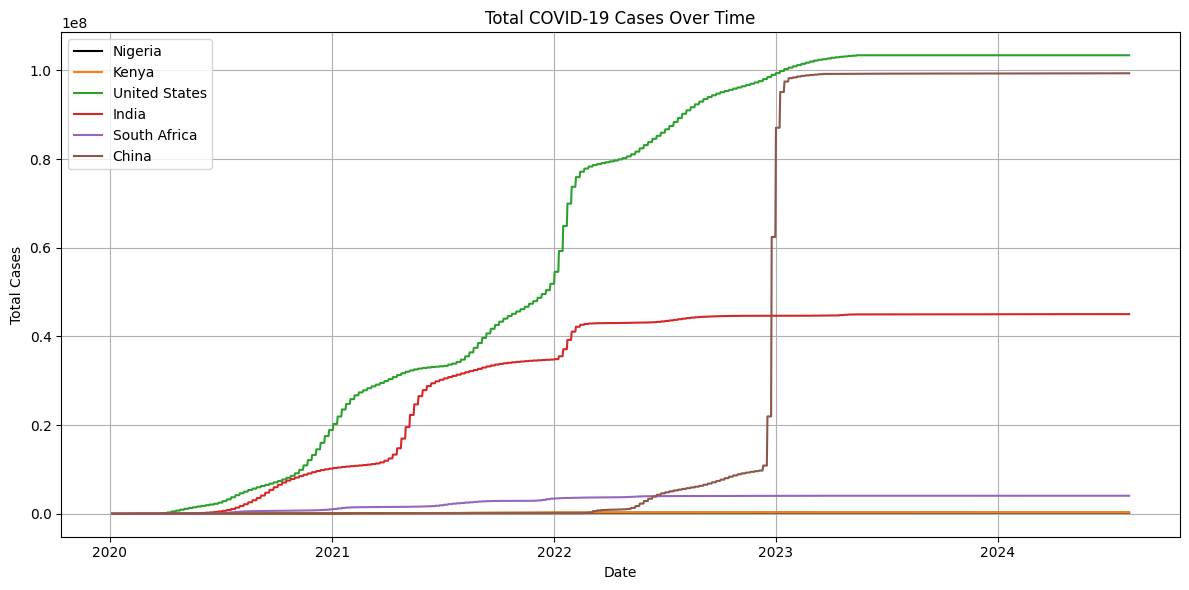

In [54]:
import matplotlib.pyplot as plt

# Load and prepare the data
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])

# Define countries and custom colors
countries_of_interest = ['Nigeria', 'Kenya', 'United States', 'India', 'South Africa', 'China']
colors = {
    'Nigeria': "#000000",      # Blue
    'Kenya': '#ff7f0e',        # Orange
    'United States': '#2ca02c',# Green
    'India': '#d62728',        # Red
    'South Africa': '#9467bd', # Purple
    'China': '#8c564b'         # Brown
}

# Filter and sort
df_filtered = df[df['location'].isin(countries_of_interest)].copy()
df_filtered = df_filtered.sort_values(by=['location', 'date'])

# Plot
plt.figure(figsize=(12, 6))

for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country, color=colors[country])

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


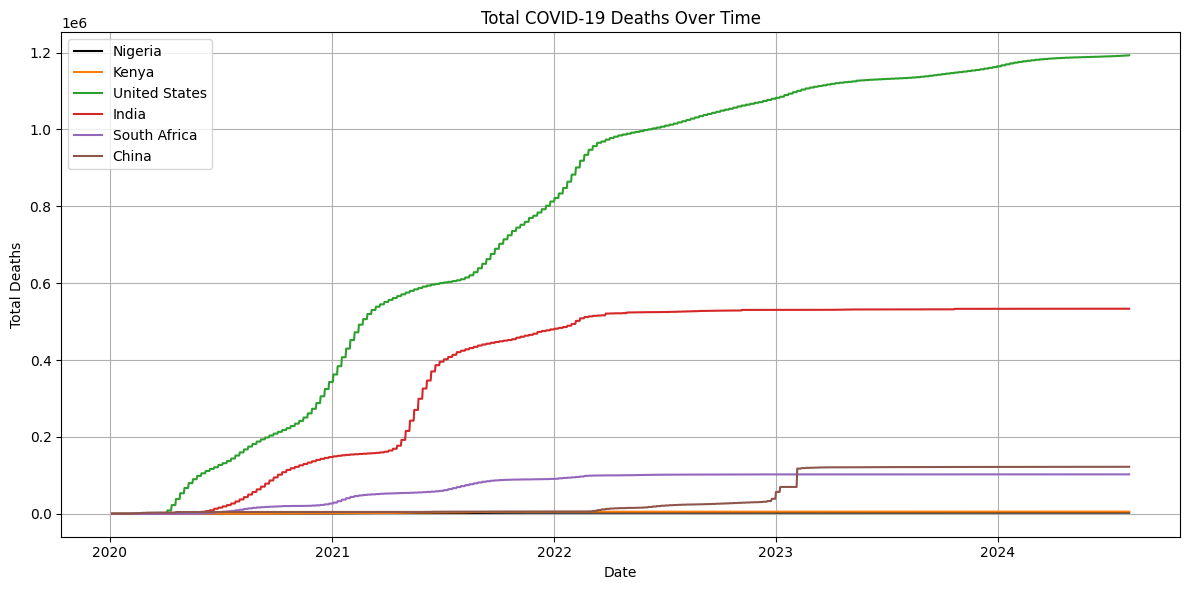

In [55]:
# Define countries and custom colors
countries_of_interest = ['Nigeria', 'Kenya', 'United States', 'India', 'South Africa', 'China']

# Filter data
df_filtered = df[df['location'].isin(countries_of_interest)].copy()
df_filtered = df_filtered.sort_values(by=['location', 'date'])

# Plot total deaths over time
plt.figure(figsize=(12, 6))

for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country, color=colors[country])

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



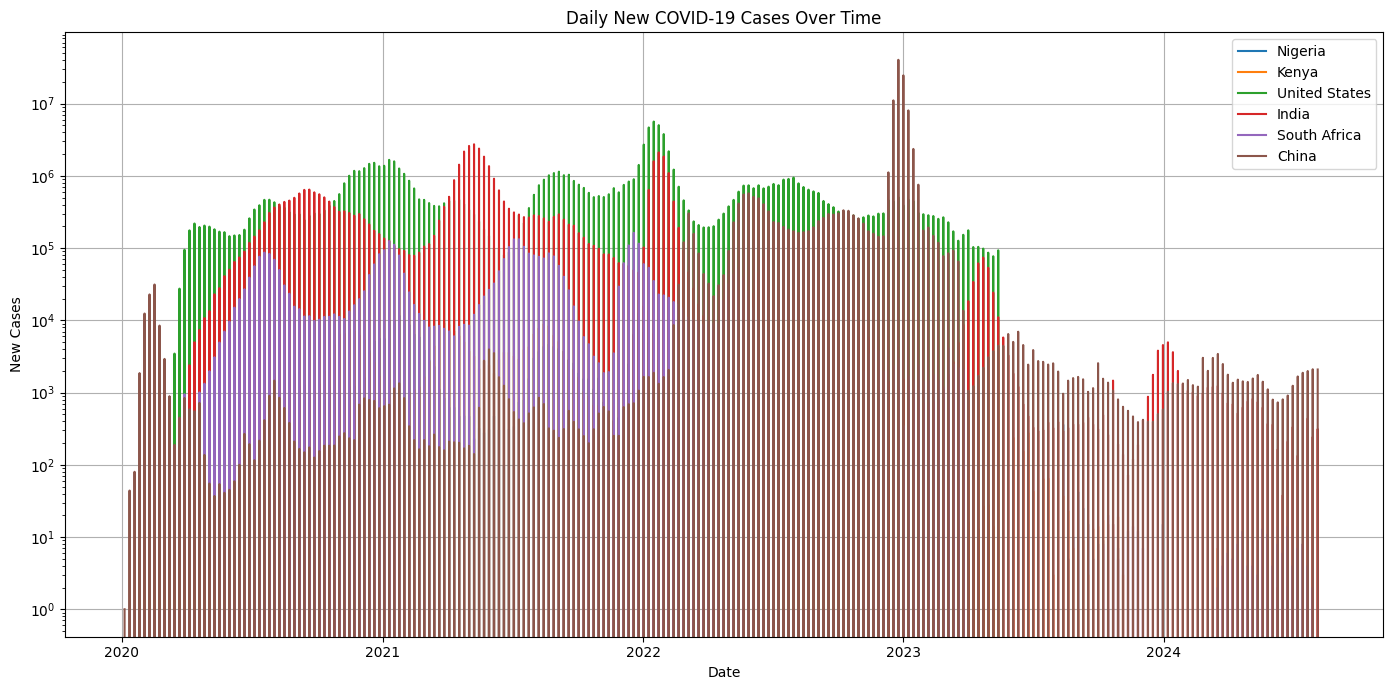

In [68]:

# Load and prepare data
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])

# Define countries of interest
countries_of_interest = ['Nigeria', 'Kenya', 'United States', 'India', 'South Africa', 'China']
colors = {
    'Nigeria': '#1f77b4',
    'Kenya': '#ff7f0e',
    'United States': '#2ca02c',
    'India': '#d62728',
    'South Africa': '#9467bd',
    'China': '#8c564b'
}

# Filter relevant data
df_filtered = df[df['location'].isin(countries_of_interest)].copy()
df_filtered = df_filtered.sort_values(['location', 'date'])

# Fill missing new_cases with 0
df_filtered['new_cases'] = df_filtered['new_cases'].fillna(0)

# Plot
plt.figure(figsize=(14, 7))

for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country, color=colors[country])

plt.title('Daily New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.yscale('log')  # Optional: Use logarithmic scale for better visibility
plt.show()


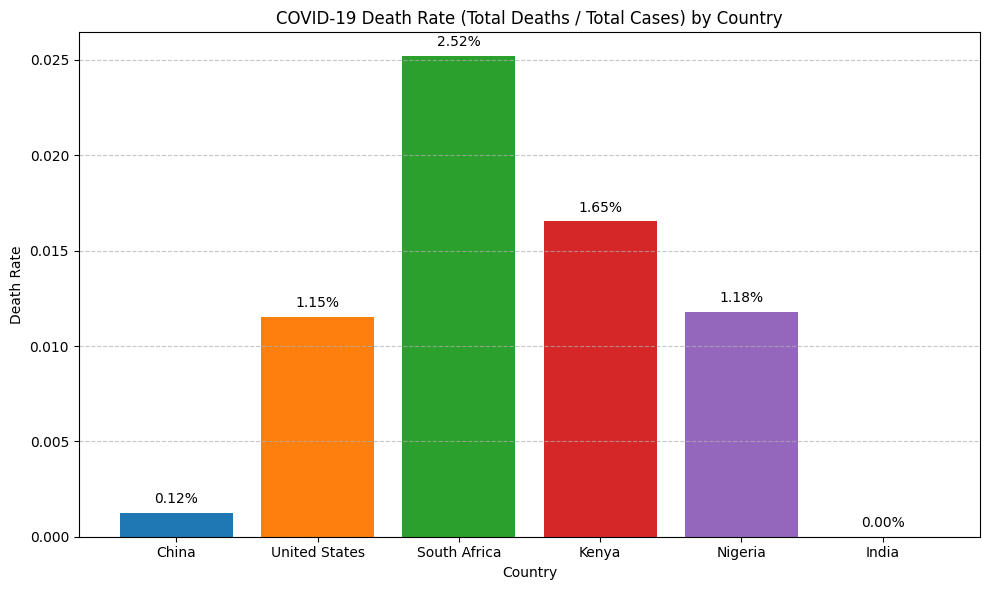

In [76]:

# Load and prepare data
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])

# Define countries of interest
countries_of_interest = ['Nigeria', 'Kenya', 'United States', 'India', 'South Africa', 'China']

# Filter and get the latest data per country
df_filtered = df[df['location'].isin(countries_of_interest)].copy()
latest_data = df_filtered.sort_values('date').groupby('location').tail(1)

# Replace zero total_cases with NaN to avoid division by zero
latest_data['total_cases'] = latest_data['total_cases'].replace(0, pd.NA)
latest_data['total_deaths'] = latest_data['total_deaths'].fillna(0)

# Calculate death rate
latest_data['death_rate'] = latest_data['total_deaths'] / latest_data['total_cases']
latest_data['death_rate'] = latest_data['death_rate'].fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(latest_data['location'], latest_data['death_rate'],
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Annotate values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}',  # Format as percentage
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.title('COVID-19 Death Rate (Total Deaths / Total Cases) by Country')
plt.ylabel('Death Rate')
plt.xlabel('Country')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [75]:
# Replace zero or missing total_cases to avoid divide-by-zero
latest_data['total_cases'] = latest_data['total_cases'].replace(0, pd.NA)
latest_data['total_deaths'] = latest_data['total_deaths'].fillna(0)

# Calculate death rate
latest_data['death_rate'] = latest_data['total_deaths'] / latest_data['total_cases']
latest_data['death_rate'] = latest_data['death_rate'].fillna(0)

# Now print
print(latest_data[['location', 'date', 'total_cases', 'total_deaths', 'death_rate']])


             location       date  total_cases  total_deaths  death_rate
75343           China 2024-08-04   99373219.0      122304.0    0.001231
175222          India 2024-08-04   45041748.0      533623.0    0.011847
357563   South Africa 2024-08-04    4072765.0      102595.0    0.025191
196995          Kenya 2024-08-04     344106.0        5689.0    0.016533
275510        Nigeria 2024-08-04     267188.0        3155.0    0.011808
405124  United States 2024-08-04  103436829.0     1193165.0    0.011535
